In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
from IPython.display import display
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:
from LoadMultiFiles import LoadOneFileUproot
from ConcanatePreviousPrediction import GetSelectedDataframe
import seaborn as sns
import pandas as pd
fileID = 0
path_evtTruth=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/root/sn_tag_{fileID}.root"
path_AP=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/AfterPulsePrediction/root/TagAfterPulse_{fileID}.root"
path_PSD=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/root/user_PSD_{fileID}_SN.root"
path_IBD=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/root_PromptDelayedSelection/IBD_{fileID}_optimized.root"
path_CC=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/root_PromptDelayedSelection/CC_{fileID}_optimized.root"
path_Singles = f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/OptimizeIsolationCut/root/Isolation_0_IsolationCriteria_3m_1.0ms.root"
R_FV_cut = 17
df_map = GetSelectedDataframe(path_evtTruth=path_evtTruth,
                              path_IBD=path_IBD,
                              path_AP=path_AP,
                              path_PSD=path_PSD,
                              path_CC=path_CC,
                              path_Singles=path_Singles,
                              inf_from_evtType=["evtType", "R", "recE", "ratioAP", "ratioSN", "fileNo","detID", "detIDs",
                                                "recX", "recY", "recZ","TriggerTime","TriggerTimeInterval","evtID"],
                              load_isolationResult=True)
df_map

evtType             R       recE   ratioAP   ratioSN  fileNo  detID  \
0             pES   6854.586489   0.195969  0.003297  0.319780       0      6   
1             N12  15130.035355  58.678581  0.013063  0.981472       0      7   
2      AfterPulse    586.030974   0.444959  0.582113  0.028527       0      7   
3      AfterPulse    540.508380   0.287102  0.714500  0.000000       0     -1   
4            IBDp  12277.913790  12.297911  0.012760  0.961626       0     13   
...           ...           ...        ...       ...       ...     ...    ...   
18663         pES  14187.729726   0.173486  0.004525  0.338235      28     91   
18664        IBDp  11950.287108  12.726572  0.013044  0.961896      28     92   
18665        IBDd  12043.002196   2.300554  0.012150  0.859468      28     92   
18666        IBDp  15591.648029  17.081907  0.012801  0.968430      28     93   
18667        IBDd  16034.545889   2.229551  0.012538  0.861417      28     93   

      detIDs         recX          recY  ...  TagAP  TagIBDp  TagIBDd  \
0        [6] -4925.322266  -2619.566650  ...      0        0        0   
1        [7] -6283.850098  12852.231445  ...      0        0        0   
2        [7]   139.278885    -23.865454  ...      1        0        0   
3         []    81.301765   -534.210999  ...      1        0        0   
4       [13]  4992.425293  10178.103516  ...      0        1        0   
...      ...          ...           ...  ...    ...      ...      ...   
18663   [91]  6186.286621   2394.746094  ...      0        0        0   
18664   [92] -7299.820801   4423.094727  ...      0        1        0   
18665   [92] -7529.791504   4455.890137  ...      0        0        1   
18666   [93]  5044.806152  14350.795898  ...      0        1        0   
18667   [93]  6145.125000  14461.286133  ...      0        0        1   

       IBDSource        psdVal  TagPSD  TagCCp  TagCCd  CCSource  TagSingle  
0             -1  4.332481e-03       2       0       0         0          0  
1             -1  9.998755e-01       1       1       0        -1          0  
2              0  5.603862e-03       2       0       0         0          0  
3              0  7.416920e-07       2       0       0         0          0  
4             -1  9.968648e-01       1       0       0         0          0  
...          ...           ...     ...     ...     ...       ...        ...  
18663         -1  1.275571e-03       2       0       0         0          0  
18664         -1  9.985903e-01       1       0       0         0          0  
18665      18664  9.971751e-01       1       0       0         0          0  
18666         -1  9.998966e-01       1       0       0         0          0  
18667      18666  9.983866e-01       1       0       0         0          0  

[18668 rows x 24 columns]

## Try to find back detID in pipe up events
* len(detIDs) > 1

In [26]:
df_map_reset_index = df_map.set_index(["fileNo","detID"]).sort_index()
for index, row in df_map[ (df_map["detID"]==-1) & ( (df_map["evtType"]=="IBDd") | (df_map["evtType"]=="IBDp") | (df_map["evtType"]=="IBD") )].iterrows():
    if len(row["detIDs"]) >0:
        for detID in row["detIDs"]:
            if detID not in df_map_reset_index.loc[ row["fileNo"] ].index:
                continue
            v_evtType = list( df_map_reset_index.loc[ (row["fileNo"],detID) ]["evtType"])

            if ( ("IBDp" in v_evtType) and ("IBDd" in v_evtType) ) or ("IBD" not in "".join(v_evtType) ) :
                continue
            df_map.at[index, "detID"] = np.array( df_map.set_index(["fileNo","detID"]).loc[ (row["fileNo"],detID ) ].index.get_level_values("detID") )[0]
df_map_reset_index = df_map.set_index(["fileNo","detID"]).sort_index()

# display(df_map.loc[101])


# Trigger Time Interval Distribution

In [4]:
from PlotDetectorGeometry import GetR3_XYZ
df_map["R"] = GetR3_XYZ( df_map["recX"],df_map["recY"], df_map["recZ"] )**(1/3)/1e3
df_map["R^3"] = GetR3_XYZ( df_map["recX"],df_map["recY"], df_map["recZ"] )/1e9
df_map["TriggerTime"] /= 1e3
df_map["TriggerTimeInterval"] = np.concatenate( ([0],np.diff( df_map["TriggerTime"] )) )
df_map

evtType          R       recE   ratioAP   ratioSN  fileNo  detID  \
0             pES   6.854586   0.195969  0.003297  0.319780       0      6   
1             N12  15.130035  58.678581  0.013063  0.981472       0      7   
2      AfterPulse   0.586031   0.444959  0.582113  0.028527       0      7   
3      AfterPulse   0.540508   0.287102  0.714500  0.000000       0     -1   
4            IBDp  12.277914  12.297911  0.012760  0.961626       0     13   
...           ...        ...        ...       ...       ...     ...    ...   
18663         pES  14.187730   0.173486  0.004525  0.338235      28     91   
18664        IBDp  11.950287  12.726572  0.013044  0.961896      28     92   
18665        IBDd  12.043002   2.300554  0.012150  0.859468      28     92   
18666        IBDp  15.591648  17.081907  0.012801  0.968430      28     93   
18667        IBDd  16.034546   2.229551  0.012538  0.861417      28     93   

      detIDs         recX          recY  ...  TagIBDp  TagIBDd  IBDSource  \
0        [6] -4925.322266  -2619.566650  ...        0        0         -1   
1        [7] -6283.850098  12852.231445  ...        0        0         -1   
2        [7]   139.278885    -23.865454  ...        0        0          0   
3         []    81.301765   -534.210999  ...        0        0          0   
4       [13]  4992.425293  10178.103516  ...        1        0         -1   
...      ...          ...           ...  ...      ...      ...        ...   
18663   [91]  6186.286621   2394.746094  ...        0        0         -1   
18664   [92] -7299.820801   4423.094727  ...        1        0         -1   
18665   [92] -7529.791504   4455.890137  ...        0        1      18664   
18666   [93]  5044.806152  14350.795898  ...        1        0         -1   
18667   [93]  6145.125000  14461.286133  ...        0        1      18666   

             psdVal  TagPSD  TagCCp  TagCCd  CCSource  TagSingle          R^3  
0      4.332481e-03       2       0       0         0          0   322.065186  
1      9.998755e-01       1       1       0        -1          0  3463.536977  
2      5.603862e-03       2       0       0         0          0     0.201262  
3      7.416920e-07       2       0       0         0          0     0.157909  
4      9.968648e-01       1       0       0         0          0  1850.860721  
...             ...     ...     ...     ...       ...        ...          ...  
18663  1.275571e-03       2       0       0         0          0  2855.871878  
18664  9.985903e-01       1       0       0         0          0  1706.612877  
18665  9.971751e-01       1       0       0         0          0  1746.643599  
18666  9.998966e-01       1       0       0         0          0  3790.321657  
18667  9.983866e-01       1       0       0         0          0  4122.588568  

[18668 rows x 25 columns]

[]

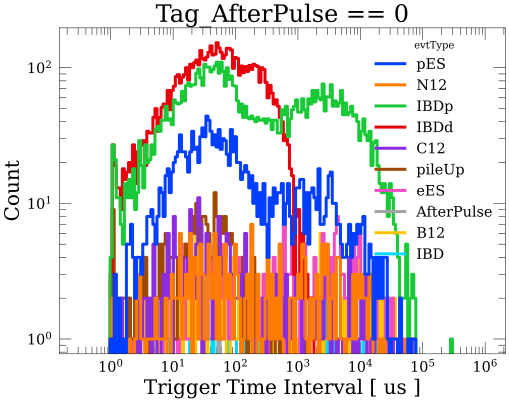

In [5]:
sns.histplot(x="TriggerTimeInterval", data=df_map[df_map["TagAP"]==0], element="step", fill=False,
             bins=np.logspace(-0.5,6, 200), hue="evtType",palette="bright")
plt.xlabel("Trigger Time Interval [ us ]")
plt.title("Tag_AfterPulse == 0")
plt.semilogx()
plt.semilogy()

## Trigger Time Distribution of Different events

[]

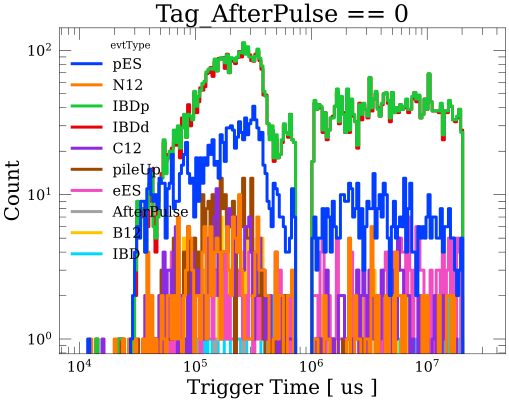

In [6]:
sns.histplot(x="TriggerTime", data=df_map[df_map["TagAP"]==0], element="step", fill=False,
             bins=np.logspace(4,7.5, 200), hue="evtType",palette="bright")
plt.xlabel("Trigger Time [ us ]")
plt.title("Tag_AfterPulse == 0")
plt.semilogx()
plt.semilogy()

## Residual Components
### 1. Energy Sepectrum

/cvmfs/juno.ihep.ac.cn/sw/anaconda/Anaconda3-2020.11-Linux-x86_64/envs/root624/lib/python3.8/site-packages/pandas/core/array_algos/replace.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


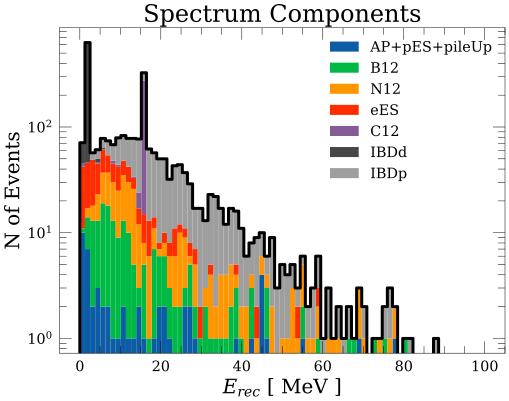

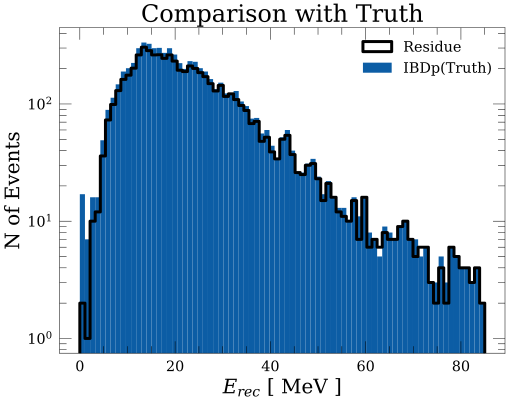

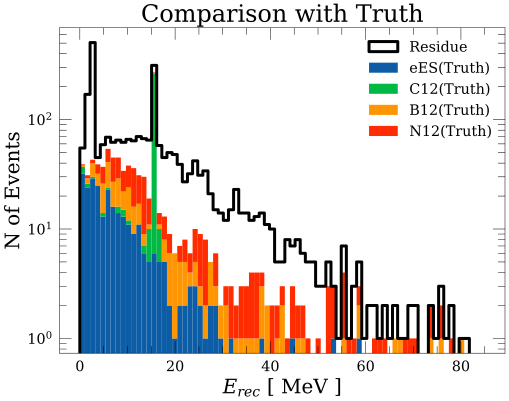

In [7]:
from importlib import reload
import PlotSpectrum
reload(PlotSpectrum)
from PlotSpectrum import PlotSpectrumComponents, CompareWithTruthSpectrum
index_residue = ( (df_map["TagAP"]==0) & (df_map["TagIBDp"]==0) &
                  (df_map["TagIBDd"]==0) & (df_map["TagPSD"]==1) )
tag_other = "AP+pES+pileUp"
PlotSpectrumComponents( df_map[index_residue].replace({"AfterPulse":tag_other, "pES":tag_other,"pileUp":tag_other,"IBD":"IBDp"}) )
plt.figure()
CompareWithTruthSpectrum(df_map[( (df_map["TagAP"]==0) & (df_map["TagIBDp"]==1) )], df_map, v_truth_to_plot=["IBDp"])

plt.figure()
CompareWithTruthSpectrum(df_map[index_residue], df_map, v_truth_to_plot=["eES", "C12", "B12", "N12"])

In [8]:
v_PSD_Tags = [2, 1]
df_map_within_FV = df_map[df_map["R"]<R_FV_cut]
v_Title = ["pES", "eES+CC+NC"]
index_notIBD = ( (df_map_within_FV["TagAP"]==0) & (df_map_within_FV["TagIBDp"]==0) & (df_map_within_FV["TagIBDd"]==0) )
df_residue_components = pd.DataFrame()
for PSD_tag, title in zip( v_PSD_Tags, v_Title ):
    df_temp = df_map_within_FV[ index_notIBD & (df_map_within_FV["TagPSD"]==PSD_tag) ].groupby("evtType").size().reset_index(name=title).set_index("evtType")
    df_temp[title] = df_temp[title]/ np.sum( df_temp[title] )
    df_residue_components = pd.concat( [df_residue_components,df_temp], axis=1)

# IBD Selection
index_IBD_event = ((df_map_within_FV["TagAP"]==0) &
                   ( (df_map_within_FV["TagIBDp"]==1) & (df_map_within_FV["TagIBDd"]==0) )  )
title="IBD"
df_temp = df_map_within_FV[ index_IBD_event ].groupby("evtType").size().reset_index(name=title).set_index("evtType")
df_temp[title] = df_temp[title]/ np.sum( df_temp[title] )
df_residue_components = pd.concat( [df_residue_components,df_temp], axis=1)

df_residue_components =  df_residue_components.fillna(0)
pd.options.display.float_format = '{:,.2f}'.format
df_residue_components*100

pES  eES+CC+NC   IBD
evtType                          
AfterPulse  0.18       0.16  0.00
C12         0.12      20.21  0.03
IBD         0.24       1.64  0.05
IBDd        1.07      11.87  0.03
IBDp        1.07      14.08 97.77
eES         0.48      19.07  0.02
pES        94.69       0.65  0.07
pileUp      2.15       2.54  1.97
B12         0.00      12.27  0.05
N12         0.00      17.51  0.00

# What do missed IBDs Look like?


In [9]:
display( df_map[df_map["R"]<R_FV_cut].groupby([ "TagIBDp","TagIBDd","evtType"]).size() )

TagIBDp  TagIBDd  evtType   
0        0        AfterPulse    2343
                  B12            150
                  C12            252
                  IBD             24
                  IBDd           189
                  IBDp           206
                  N12            215
                  eES            241
                  pES           1626
                  pileUp          67
         1        B12              1
                  IBD             19
                  IBDd          5741
                  IBDp             1
                  pileUp          64
1        0        B12              3
                  C12              2
                  IBD              3
                  IBDd             2
                  IBDp          5843
                  eES              1
                  pES              4
                  pileUp         118
dtype: int64

## 1. Missed IBDd

### Missed IBD Events Distribution

Text(0.5, 1.0, 'Missed IBD')

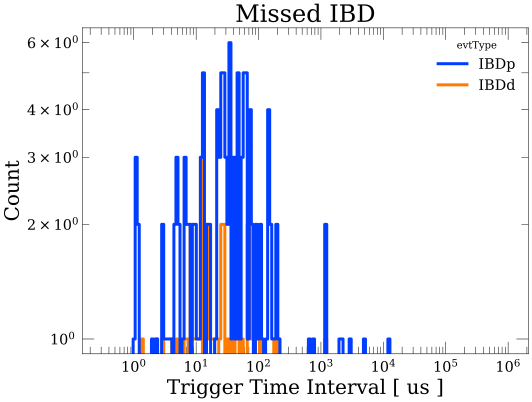

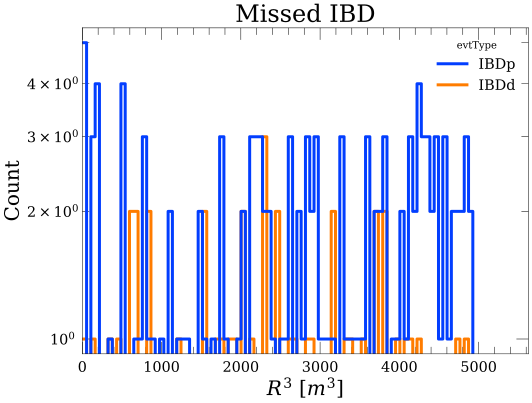

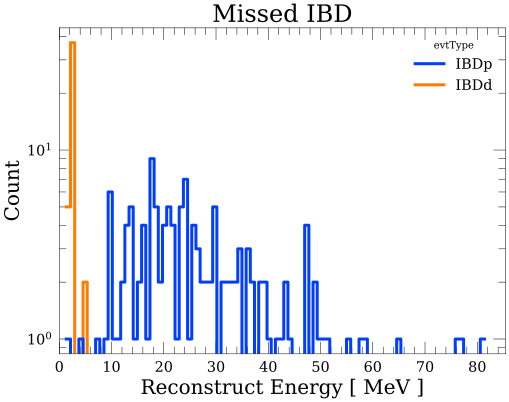

In [10]:
df_map_miss_IBD = df_map[ (df_map["TagAP"]==0) & (df_map["TagCCd"]==0) & (df_map["TagCCp"]==0) & (df_map["TagSingle"]==1)&
                          ( ( (df_map["TagIBDd"]==0) & (df_map["evtType"]=="IBDd") & (df_map["R"]<R_FV_cut)) |
                            ( (df_map["TagIBDp"]==0) & (df_map["evtType"]=="IBDp") & (df_map["R"]<R_FV_cut) ) ) ]
sns.histplot(x="TriggerTimeInterval",
             data=df_map_miss_IBD,
             element="step", fill=False,
             bins=np.logspace(-0.5,6, 200),
             hue="evtType",palette="bright")
plt.xlabel("Trigger Time Interval [ us ]")
plt.title("Missed IBD")
plt.semilogx()
plt.semilogy()

plt.figure()
sns.histplot(x="R^3",
             data=df_map_miss_IBD,
             element="step", fill=False,
             hue="evtType",palette="bright",
             bins=np.linspace(0, 5360, 100))
plt.xlim(0,)
plt.xlabel("$R^3$ [$m^3$]")
plt.title("Missed IBD")
plt.semilogy()

plt.figure()
sns.histplot(x="recE",
             data=df_map_miss_IBD,
             element="step", fill=False,
             hue="evtType",palette="bright",
             bins=100)
plt.xlim(0,)
plt.semilogy()
plt.xlabel("Reconstruct Energy [ MeV ]")
plt.title("Missed IBD")


## Truth IBD Pair

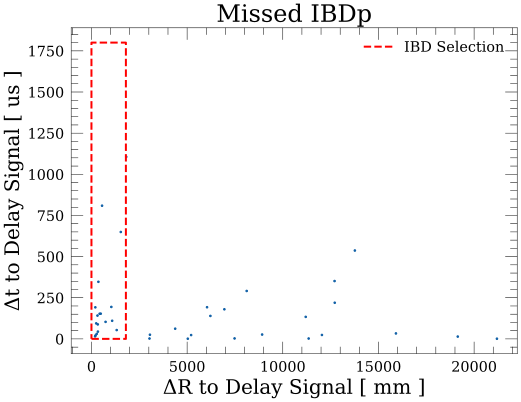

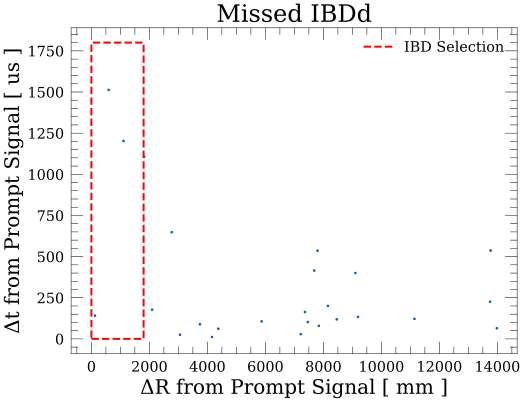

In [11]:
from collections import Counter
def Get_dR(df1, df2):
    df_dR = ( ( df1["recX"]-df2["recX"] )**2+
             ( df1["recY"]-df2["recY"] )**2+
             ( df1["recZ"]-df2["recZ"] )**2 ) ** 0.5
    return df_dR.dropna()

# Get Selection Criteria
def GetMinAndMax(df, key):
    return ( df.loc[key]['min'], df.loc[key]['max'] )
df_parameters = pd.read_xml("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/IBDSelectionCriteria_optimized.xml",
                xpath="//condition").set_index("name")

dR_cut = GetMinAndMax(df_parameters, "distance") # mm
t_cut =  GetMinAndMax(df_parameters, "deltaT") # ns
Ed_cut = GetMinAndMax(df_parameters, "denergy")
Ep_cut = GetMinAndMax(df_parameters, "penergy")
Ed_cut2 = (4.79361066, 5.34671959)

v_cut_line_dt = np.array([t_cut[0], t_cut[0], t_cut[1], t_cut[1], t_cut[0]])/1000
v_cut_line_dR = np.array([dR_cut[0], dR_cut[1], dR_cut[1], dR_cut[0], dR_cut[0]])


items_interest = ["evtID","evtType", "recE","TriggerTime", "R", "TriggerTimeInterval", "TagIBDp", "TagIBDd", "IBDSource",
                  "recX", "recY"]
df_map_IBDp_group_by_fileNo = df_map[(df_map["evtType"]=="IBDp")].set_index(["fileNo", "detID"])
df_map_IBDd_group_by_fileNo = df_map[(df_map["evtType"]=="IBDd")].set_index(["fileNo", "detID"])

df_map_IBDp_missed = df_map_miss_IBD[ (df_map_miss_IBD["evtType"]=="IBDp") &
                                      (df_map_miss_IBD["detID"]!=-1) &
                                      (df_map_miss_IBD["R"]<R_FV_cut)].set_index(["fileNo", "detID"])
df_map_IBDd_missed = df_map_miss_IBD[ (df_map_miss_IBD["evtType"]=="IBDd") & (df_map_miss_IBD["detID"]!=-1) ].set_index(["fileNo", "detID"])

dT_missed_IBDp = ( df_map_IBDd_group_by_fileNo["TriggerTime"]-df_map_IBDp_missed["TriggerTime"] ).dropna()
dR_missed_IBDp = Get_dR(df_map_IBDd_group_by_fileNo, df_map_IBDp_missed)
plt.plot(v_cut_line_dR, v_cut_line_dt, color="r", linewidth=2, ls="--", label="IBD Selection")
plt.scatter( dR_missed_IBDp, dT_missed_IBDp,s=3)
plt.xlabel("$\Delta$R to Delay Signal [ mm ]")
plt.ylabel("$\Delta$t to Delay Signal [ us ]")
plt.title("Missed IBDp")
plt.legend()

plt.figure()
dT_missed_IBDd = -( df_map_IBDp_group_by_fileNo["TriggerTime"]-df_map_IBDd_missed["TriggerTime"] ).dropna()
dR_missed_IBDd = Get_dR(df_map_IBDp_group_by_fileNo, df_map_IBDd_missed)
plt.plot(v_cut_line_dR, v_cut_line_dt, color="r", linewidth=2, ls="--",label="IBD Selection")
plt.scatter( dR_missed_IBDd, dT_missed_IBDd,s=3)
plt.xlabel("$\Delta$R from Prompt Signal [ mm ]")
plt.ylabel("$\Delta$t from Prompt Signal [ us ]")
plt.title("Missed IBDd")
plt.legend()

# plt.figure()
# sns.histplot(x="R", data=df_map[df_map["TagIBDp"]==1],bins=np.linspace(0,17.5, 100))


## Show Missed IBD Situation

evtType  ratioSN  ratioAP     R  fileNo detIDs  detID  TriggerTime  \
evtID                                                                      
3835     IBDp     0.97     0.01 12.15       5  [135]    135   149,351.62   
3836     IBDp     0.97     0.01 12.93       5  [136]    136   149,358.31   
3837      C12     0.97     0.01 10.30       5  [137]    137   149,368.95   

         TagIBD  recE  
evtID                  
3835    TagIBDp 18.66  
3836   Untagged 23.66  
3837   Untagged 15.95

/cvmfs/juno.ihep.ac.cn/sw/anaconda/Anaconda3-2020.11-Linux-x86_64/envs/root624/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


evtType  recE  ratioSN  ratioAP     R  fileNo      detIDs  detID  \
evtID                                                                        
3834         IBDp 17.91     0.97     0.01 12.80       5       [134]    134   
3835         IBDp 18.66     0.97     0.01 12.15       5       [135]    135   
3836         IBDp 23.66     0.97     0.01 12.93       5       [136]    136   
3837          C12 15.95     0.97     0.01 10.30       5       [137]    137   
3838         IBDp 57.16     0.98     0.01 14.45       5       [138]    138   
3839   AfterPulse  0.33     0.02     0.51 11.46       5       [138]    138   
3840   AfterPulse  0.29     0.00     0.69  0.88       5          []     -1   
3841         IBDd  2.19     0.86     0.01 12.18       5       [135]    135   
3842       pileUp 21.61     0.97     0.01 15.01       5  [136, 139]     -1   

       TriggerTime    TagIBD  
evtID                         
3834    149,304.19   TagIBDp  
3835    149,351.62   TagIBDp  
3836    149,358.31  Untagged  
3837    149,368.95  Untagged  
3838    149,416.22   TagIBDp  
3839    149,417.32     TagAP  
3840    149,419.49     TagAP  
3841    149,432.39   TagIBDd  
3842    149,479.81   TagIBDp

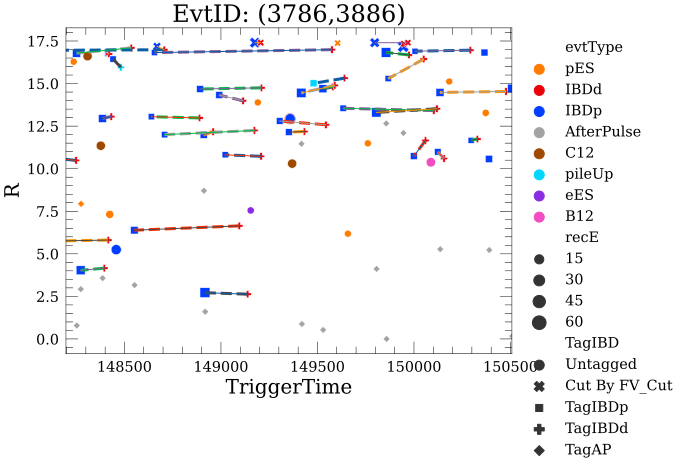

In [12]:
from importlib import reload
import DisplayIBDTimeSeries
reload(DisplayIBDTimeSeries)
from DisplayIBDTimeSeries import PlotTimeSeries
from matplotlib.backends.backend_pdf import PdfPages

# display( df_map[(df_map["TriggerTime"]>775e3)&(df_map["TriggerTime"]<780e3)][["evtID","evtType", "recE", "ratioSN", "R", "fileNo","detIDs","detID"]]\
#          .set_index("evtID").loc[1257:1357] )
focus_evtID = 3836
PlotTimeSeries(df_map, focus_evtID-50, focus_evtID+50, FV_cut=R_FV_cut,key_y_plot="R",
                 focus_evtID=focus_evtID)
display( df_map[(df_map["TriggerTime"]>149.3e3)&(df_map["TriggerTime"]<149.51e3)]
         [["evtID","evtType", "recE", "ratioSN","ratioAP", "R", "fileNo","detIDs","detID","TriggerTime", "TagIBD"]]
         .set_index("evtID") )
# for index, row in df_map[df_map["fileNo"]==3].iterrows():
#     if 56 in row["detIDs"]:
#         display(row)
    # df_map_reset_index.loc[(5, 136)]

In [13]:
# with PdfPages("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/table.pdf") as pp:
#     for evtID in df_map_miss_IBD[(df_map_miss_IBD["detID"]!=-1) & ((df_map_miss_IBD["R"]<17)&
#                                                                    (df_map_miss_IBD["evtType"]=="IBDp"))]["evtID"].iloc[10:300:10]:
#
#         fig, fig_table = PlotTimeSeries(df_map, evtID-50,evtID+50, FV_cut=R_FV_cut,key_y_plot="R",
#                        focus_evtID=evtID,deltaT_focus_table=100)
#         plt.xlabel("Trigger Time [ us ]")
#         plt.ylabel("R [ m ]")
#         pp.savefig(fig,bbox_inches='tight' )
#         pp.savefig(fig_table, bbox_inches="tight")
#         plt.close(fig)
#         plt.close(fig_table)
#


In [14]:
display(df_map[df_map["R"]<R_FV_cut].groupby(["TagIBDp","TagIBDd","evtType"]).size().xs(1, level="TagIBDp"))
display(df_map.groupby(["TagIBDp","TagIBDd","evtType"]).size().xs(1, level="TagIBDd"))
df_map.groupby(["TagIBDp","TagIBDd","evtType"]).size()

TagIBDd  evtType
0        B12           3
         C12           2
         IBD           3
         IBDd          2
         IBDp       5843
         eES           1
         pES           4
         pileUp      118
dtype: int64

TagIBDp  evtType
0        B12           1
         IBD          20
         IBDd       5889
         IBDp          1
         pileUp       65
dtype: int64

TagIBDp  TagIBDd  evtType   
0        0        AfterPulse    2348
                  B12            160
                  C12            283
                  IBD             27
                  IBDd           671
                  IBDp           840
                  N12            247
                  eES            272
                  pES           1787
                  pileUp          81
         1        B12              1
                  IBD             20
                  IBDd          5889
                  IBDp             1
                  pileUp          65
1        0        B12              3
                  C12              2
                  IBD              3
                  IBDd             2
                  IBDp          5843
                  eES              1
                  pES              4
                  pileUp         118
dtype: int64

# Why cannot select IBDp or IBDd
## 1. Because of missed corresponding IBD signal

In [27]:
dir_evtType_pairs = {"IBDp":"IBDd", "IBDd":"IBDp"}
v_truth_index_partner = np.ones(len(df_map_miss_IBD))*-1
for i, (index, row) in enumerate(df_map_miss_IBD.iterrows()):
    for detID in row["detIDs"]:
        try:
            df_tmp = df_map_reset_index.loc[(row["fileNo"], detID)]
        except KeyError:
            pass
        df_truth_partner = df_tmp[df_tmp["evtType"]==dir_evtType_pairs[row["evtType"]]]
        if len(df_truth_partner)>0:
            if len(df_truth_partner["evtID"])==1:
                v_truth_index_partner[i] = int(df_truth_partner["evtID"])
            else:
                v_truth_index_partner[i] = -2
                print("###############")
                display(row)
                display(df_truth_partner)
                # break
        elif len(df_tmp[df_tmp["evtType"]=="IBD"]):
            v_truth_index_partner[i] = int(df_tmp[df_tmp["evtType"]=="IBD"]["evtID"])
        else:
            pass

###############


evtType                     IBDd
R                          13.22
recE                        2.29
ratioAP                     0.01
ratioSN                     0.87
fileNo                        11
detID                        439
detIDs                     [439]
recX                     -174.26
recY                   12,700.43
recZ                    3,671.78
TriggerTime           330,118.47
TriggerTimeInterval        70.79
evtID                       9220
TagAP                          0
TagIBDp                        0
TagIBDd                        0
IBDSource                     -1
psdVal                      1.00
TagPSD                         1
TagCCp                         0
TagCCd                         0
CCSource                      -1
TagSingle                      1
R^3                     2,311.33
Truth_Partner                 -1
Name: 9220, dtype: object

evtType    R  recE  ratioAP  ratioSN           detIDs    recX  \
fileNo detID                                                                 
11     439      IBDp 0.59  9.88     0.04     0.94  [437, 438, 439] -203.37   
       439      IBDp 5.42  5.28     0.11     0.83       [437, 439]  -53.17   

                 recY     recZ  TriggerTime  ...  TagIBDd  IBDSource  psdVal  \
fileNo detID                                 ...                               
11     439    -496.76  -249.94   329,581.56  ...        0         -1    0.92   
       439   5,221.36 1,460.10   329,582.68  ...        0         -1    0.00   

              TagPSD  TagCCp  TagCCd  CCSource  TagSingle    R^3    TagIBD  
fileNo detID                                                                
11     439         1       0       0        -1          1   0.21  Untagged  
       439         2       0       0         0          0 159.39  Untagged  

[2 rows x 24 columns]

###############


evtType                     IBDp
R                          13.77
recE                       58.01
ratioAP                     0.01
ratioSN                     0.98
fileNo                        12
detID                        149
detIDs                     [149]
recX                   -3,920.44
recY                     -989.97
recZ                  -13,165.70
TriggerTime           344,147.19
TriggerTimeInterval        95.19
evtID                       9534
TagAP                          0
TagIBDp                        0
TagIBDd                        0
IBDSource                     -1
psdVal                      1.00
TagPSD                         1
TagCCp                         0
TagCCd                         0
CCSource                      -1
TagSingle                      1
R^3                     2,612.47
Truth_Partner                 -2
Name: 9534, dtype: object

evtType     R  recE  ratioAP  ratioSN detIDs      recX      recY  \
fileNo detID                                                                    
12     149      IBDd 10.72  0.36     0.16     0.72  [149] -6,150.52 -1,402.99   
       149      IBDd  4.82  0.42     0.46     0.30  [149] -4,360.08    661.66   

                  recZ  TriggerTime  ...  TagIBDd  IBDSource  psdVal  TagPSD  \
fileNo detID                         ...                                       
12     149   -8,669.99   344,148.31  ...        0          0    1.00       1   
       149   -1,942.56   344,149.46  ...        0          0    0.89       1   

              TagCCp  TagCCd  CCSource  TagSingle      R^3  TagIBD  
fileNo detID                                                        
12     149         0       0         0          0 1,232.69   TagAP  
       149         0       0         0          0   111.90   TagAP  

[2 rows x 24 columns]

###############


evtType                       IBDp
R                            16.37
recE                         37.19
ratioAP                       0.01
ratioSN                       0.98
fileNo                          24
detID                           15
detIDs                        [15]
recX                     14,518.68
recY                     -1,287.09
recZ                     -7,440.75
TriggerTime           7,475,984.05
TriggerTimeInterval       1,193.96
evtID                        16342
TagAP                            0
TagIBDp                          0
TagIBDd                          0
IBDSource                       -1
psdVal                        1.00
TagPSD                           1
TagCCp                           0
TagCCd                           0
CCSource                        -1
TagSingle                        1
R^3                       4,382.77
Truth_Partner                   -2
Name: 16342, dtype: object

evtType     R  recE  ratioAP  ratioSN detIDs      recX     recY  \
fileNo detID                                                                   
24     15       IBDd 16.74  0.14     0.16     0.63   [15] -4,123.98 4,746.49   
       15       IBDd 13.37  1.68     0.14     0.73   [15] 12,067.83  -994.60   

                   recZ  TriggerTime  ...  TagIBDd  IBDSource  psdVal  TagPSD  \
fileNo detID                          ...                                       
24     15    -15,516.06 7,475,985.14  ...        0          0    1.00       1   
       15     -5,677.26 7,475,986.27  ...        0          0    0.92       1   

              TagCCp  TagCCd  CCSource  TagSingle      R^3  TagIBD  
fileNo detID                                                        
24     15          0       0         0          0 4,692.44   TagAP  
       15          0       0         0          0 2,391.91   TagAP  

[2 rows x 24 columns]

In [28]:
counter_missed_IBD = Counter( df_map_miss_IBD["evtType"] )
dir_reasons_miss_IBDd = {"sum":counter_missed_IBD["IBDd"]}
dir_reasons_miss_IBDp = {"sum":counter_missed_IBD["IBDp"]}
v_known_reason = np.zeros( len(df_map_miss_IBD) )

## 1. Missed IBDp because of IBDd not captured

In [29]:
print(Counter(v_truth_index_partner==-1) )
display(df_map_miss_IBD[(v_truth_index_partner==-1) & (df_map_miss_IBD["evtType"]=="IBDp")])
index = (v_truth_index_partner==-1) & (df_map_miss_IBD["evtType"]=="IBDp")
v_known_reason[index] = 1
n_Uncapture_neutron = len(df_map_miss_IBD[index])
print("Not captured IBDd:\t", n_Uncapture_neutron)
print("Ratio(Not capture):\t", n_Uncapture_neutron/len(df_map[df_map["evtType"]=="IBDd"]))
dir_reasons_miss_IBDp["UnCapture IBDd"]=n_Uncapture_neutron

Counter({True: 113, False: 65})


evtType     R  recE  ratioAP  ratioSN  fileNo  detID detIDs       recX  \
305      IBDp 16.09 76.02     0.01     0.98       0    276  [276]  -5,794.43   
586      IBDp 16.50 34.46     0.01     0.98       1      4    [4]     995.50   
804      IBDp 16.44 21.92     0.01     0.97       1    163  [163] -15,454.31   
1307     IBDp 15.26 37.30     0.01     0.98       2      5    [5]   9,034.49   
1360     IBDp 16.26 19.89     0.01     0.97       2     42   [42]  -5,167.50   
...       ...   ...   ...      ...      ...     ...    ...    ...        ...   
11684    IBDp  5.65 13.61     0.01     0.96      16    165  [165]   2,393.16   
15950    IBDp  8.04 13.27     0.01     0.96      23    167  [167]   3,297.22   
16248    IBDp 15.50 18.91     0.01     0.97      23    420  [420]  13,718.97   
16666    IBDp 16.88 26.31     0.01     0.97      24    303  [303] -13,878.30   
17772    IBDp 16.41 11.47     0.01     0.97      26    277  [277]  15,884.82   

            recY  ...  TagIBDd  IBDSource  psdVal  TagPSD  TagCCp  TagCCd  \
305   -14,456.38  ...        0         -1    1.00       1       0       0   
586    -8,270.55  ...        0         -1    0.98       1       0       0   
804    -3,986.78  ...        0         -1    1.00       1       0       0   
1307  -12,142.19  ...        0         -1    1.00       1       0       0   
1360    8,385.45  ...        0         -1    1.00       1       0       0   
...          ...  ...      ...        ...     ...     ...     ...     ...   
11684   5,087.10  ...        0         -1    0.99       1       0       0   
15950  -6,991.81  ...        0         -1    1.00       1       0       0   
16248  -4,176.75  ...        0         -1    1.00       1       0       0   
16666   9,210.82  ...        0         -1    0.99       1       0       0   
17772   2,394.87  ...        0         -1    1.00       1       0       0   

       CCSource  TagSingle      R^3  Truth_Partner  
305          -1          1 4,162.96             -1  
586          -1          1 4,492.06             -1  
804          -1          1 4,443.27             -1  
1307         -1          1 3,551.54             -1  
1360         -1          1 4,301.72             -1  
...         ...        ...      ...            ...  
11684        -1          1   180.16             -1  
15950        -1          1   520.24             -1  
16248        -1          1 3,721.04             -1  
16666        -1          1 4,812.38             -1  
17772        -1          1 4,415.44             -1  

[93 rows x 26 columns]

Not captured IBDd:	 93
Ratio(Not capture):	 0.014172508381590978


## 2. Cannot find IBDp truth of IBDd

In [30]:
index = (v_truth_index_partner==-1) & (df_map_miss_IBD["evtType"]=="IBDd")
v_known_reason[index] = 1
n_missed_IBDp_for_IBDp = len(df_map_miss_IBD[index])
print("Cannot find IBDp:\t",n_missed_IBDp_for_IBDp)
print("Ratio(Cannot find IBDp):\t",n_missed_IBDp_for_IBDp/len(df_map[df_map["evtType"]=="IBDd"]))
dir_reasons_miss_IBDd["No IBDp in Truth"] = n_missed_IBDp_for_IBDp

Cannot find IBDp:	 20
Ratio(Cannot find IBDp):	 0.003047851264858275


## 3. Miss IBDd because of IBDp cut by FV

In [35]:
df_map_miss_IBD["Truth_Partner"] = np.array(v_truth_index_partner,dtype=int)
v_index = np.array(v_truth_index_partner[v_truth_index_partner>0],dtype=int)
n_IBDp_cut_by_FV = 0
index = (df_map_miss_IBD["evtType"]=="IBDd")
num_index = np.where(index)[0]
for i_partner, index in zip(df_map_miss_IBD[index]["Truth_Partner"],num_index):
    if i_partner<0:
        continue
    if df_map.loc[i_partner]["R"] >R_FV_cut:
        v_known_reason[index] = 1
        n_IBDp_cut_by_FV +=1
print("IBDp cut by FV:\t",n_IBDp_cut_by_FV)
print("Ratio (IBDp cut by FV):\t", n_IBDp_cut_by_FV/len(df_map[df_map["evtType"]=="IBDd"]))
dir_reasons_miss_IBDd["IBDd cut by FV cut"] = n_IBDp_cut_by_FV

IBDp cut by FV:	 5
Ratio (IBDp cut by FV):	 0.0007619628162145687


## 4. Miss IBDp because of IBDd not in Ed_cut

In [36]:
n_IBDd_not_in_Ed_cut = 0
index = (df_map_miss_IBD["evtType"]=="IBDp")
num_index = np.where(index)[0]
for i_partner, index in zip(df_map_miss_IBD[index]["Truth_Partner"], num_index):
    if i_partner<0:
        continue
    in_Ed_cut = (Ed_cut[0]<df_map.loc[i_partner]["recE"]<Ed_cut[1]) or (Ed_cut2[0]<df_map.loc[i_partner]["recE"]<Ed_cut2[1])
    if not in_Ed_cut:
        v_known_reason[index] = 1
        n_IBDd_not_in_Ed_cut +=1
print("IBDd not in Ed_cut:\t", n_IBDd_not_in_Ed_cut)
dir_reasons_miss_IBDp["IBDd not in Ed_cut"] = n_IBDd_not_in_Ed_cut

IBDd not in Ed_cut:	 18


## 5. Miss IBDp because of pairs not in dR cut

In [37]:
n_IBDd_not_in_dR_cut = 0
v_dR_not_in_dR_cut = []
v_ratioAP_IBDp = []
v_ratioAP_IBDd = []
index = (df_map_miss_IBD["evtType"]=="IBDp")
num_index = np.where(index)[0]
for i_index, row in df_map_miss_IBD[index].iterrows():
    i = row["Truth_Partner"]
    if i<0:
        continue
    dR = ( (df_map.loc[i]["recX"]-row["recX"])**2+
                             (df_map.loc[i]["recY"]-row["recY"])**2+
                             (df_map.loc[i]["recY"]-row["recY"])**2 )**0.5
    in_dR_cut = (dR_cut[0]< dR <dR_cut[1])
    if not in_dR_cut:
        n_IBDd_not_in_dR_cut +=1
        v_dR_not_in_dR_cut.append(dR)
        v_ratioAP_IBDp.append(row["ratioAP"])
        v_ratioAP_IBDd.append(df_map.loc[i]["ratioAP"])
dir_reasons_miss_IBDp["IBDd Not in dR_cut"] = n_IBDd_not_in_dR_cut
# print(n_IBDd_not_in_dR_cut, dR_cut,min(v_dR_not_in_dR_cut))
# plt.hist(v_dR_not_in_dR_cut,bins=100)
# plt.figure()
# plt.hist2d(v_ratioAP_IBDd, v_ratioAP_IBDp,cmap="Blues")
# plt.colorbar()

## 6. IBDd not in dt_cut

In [38]:
n_IBDd_not_in_dt_cut = 0
for index, row in df_map_miss_IBD[df_map_miss_IBD["evtType"]=="IBDp"].iterrows():
    print(index)
    i = row["Truth_Partner"]
    if i<0:
        continue
    dt = (df_map.loc[i]["TriggerTime"]-row["TriggerTime"])*1e3
    in_dt_cut = (t_cut[0]< dt <t_cut[1])
    if not in_dt_cut:
        n_IBDd_not_in_dt_cut +=1
        # if dt<0:
        #     display(row)
        #     display(df_map.loc[i])

dir_reasons_miss_IBDp["Not in dt cut"] = n_IBDd_not_in_dt_cut


305
586
804
810
862
891
1307
1360
1370
1395
1460
1494
1697
1835
1858
2134
2156
2319
2383
2396
2419
2442
2550
2665
2747
2769
2775
3039
3041
3117
3228
3499
3517
3530
3533
3583
3682
3692
3805
3836
3970
4107
4131
4358
4395
4401
4462
4472
4506
4541
4565
4593
4609
4711
4835
4979
5027
5100
5113
5208
5296
5327
5339
5341
5410
5415
5446
5567
5608
5665
5749
5780
5842
5869
6076
6143
6156
6157
6172
6376
6557
6638
6664
6677
6775
6828
6837
6856
6921
6929
7139
7144
7148
7162
7280
7339
7363
7372
7478
7506
7603
7639
7842
7942
8264
8349
8478
8556
8723
8810
8833
8920
8941
9025
9101
9208
9408
9474
9534
9753
10017
10237
10294
10735
10906
10976
11055
11684
15950
16103
16248
16342
16666
17772


In [39]:
dir_reasons_miss_IBDd["Further Study"] = 2*dir_reasons_miss_IBDd["sum"]-sum(dir_reasons_miss_IBDd.values())
dir_reasons_miss_IBDp["Further Study"] = 2*dir_reasons_miss_IBDp["sum"]-sum(dir_reasons_miss_IBDp.values())
df_reasons_miss_IBDd = pd.DataFrame.from_dict(dir_reasons_miss_IBDd,orient="index", columns=["IBDd"])
df_reasons_miss_IBDp = pd.DataFrame.from_dict(dir_reasons_miss_IBDp,orient="index", columns=["IBDp"])
display(df_reasons_miss_IBDd)
display(df_reasons_miss_IBDp)

IBDd
sum                   44
No IBDp in Truth      20
IBDd cut by FV cut     5
Further Study         19

IBDp
sum                  134
UnCapture IBDd        93
IBDd not in Ed_cut    18
IBDd Not in dR_cut    19
Not in dt cut          1
Further Study          3